Here we are going to analyse the data of a mall containing the annual income ,spending score and other details of its customers for the determination of target customer groups during advertising campaigns.

# Importing the necessary libraries for analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings


# loading the dataset

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
117,118,Female,49,65,59
155,156,Female,27,78,89
114,115,Female,18,65,48
36,37,Female,42,34,17
194,195,Female,47,120,16
26,27,Female,45,28,32
83,84,Female,46,54,44
181,182,Female,32,97,86
144,145,Male,25,77,12
158,159,Male,34,78,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.duplicated().sum()

0

# Univariate analysis

In [6]:
# droping the customer id column before using the describe function to know about the data
new_data = data.drop("CustomerID",axis=1)
new_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


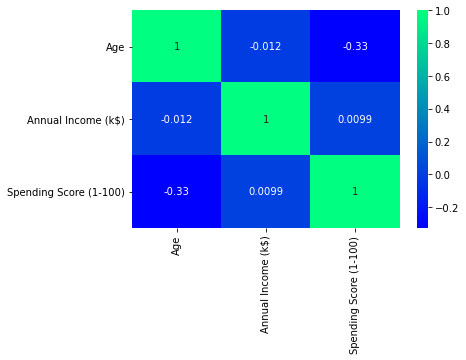

In [7]:
sns.heatmap(new_data.corr(),annot=True,cmap='winter');

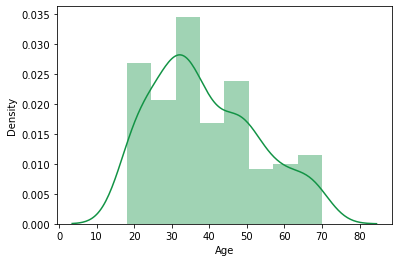

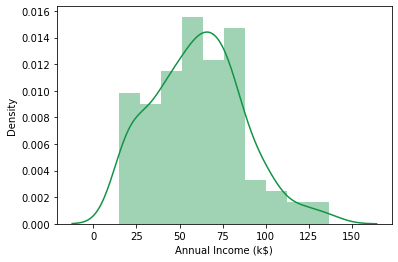

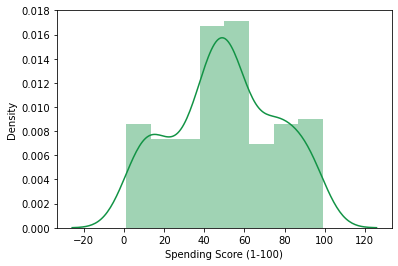

In [8]:
warnings.filterwarnings("ignore")
for i in list(new_data.drop("Gender",axis=1).columns):
    plt.figure()
    sns.distplot(data[i],color = "#129345");


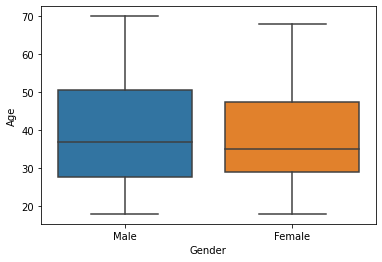

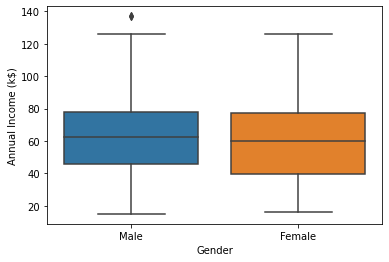

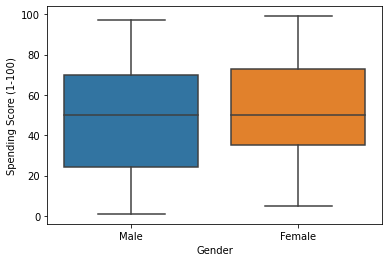

In [9]:
for i in list(new_data.drop("Gender",axis=1).columns):
    plt.figure()
    sns.boxplot(data=data,x= data["Gender"], y= data[i]);

# Bivariate Analysis

<Figure size 864x864 with 0 Axes>

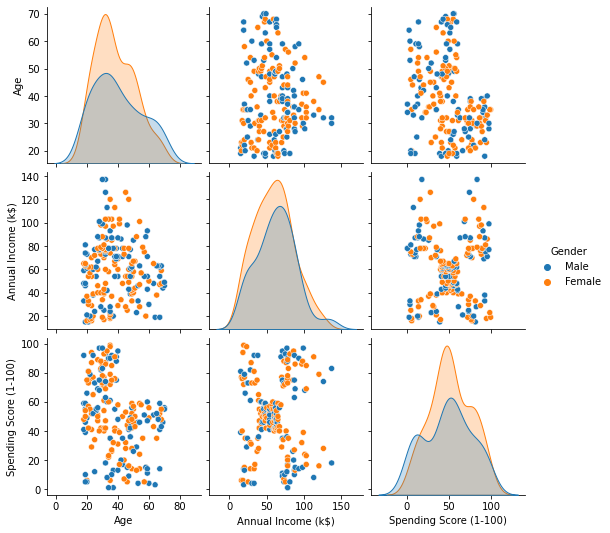

In [10]:
plt.figure(figsize=(12,12))
sns.pairplot(new_data,hue="Gender");

In [11]:
df1 = new_data.groupby("Gender")['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean().reset_index()
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Female,38.098214,59.250000,51.526786
1,Male,39.806818,62.227273,48.511364


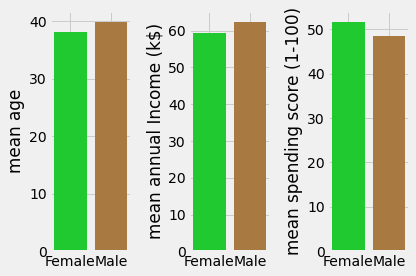

In [12]:

plt.style.use("fivethirtyeight")
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)

ax1.bar(df1["Gender"],df1["Age"],color=["#21C931","#A87A42"]);
ax2.bar(df1["Gender"],df1["Annual Income (k$)"],color=["#21C931","#A87A42"]);
ax3.bar(df1["Gender"],df1["Spending Score (1-100)"],color=["#21C931","#A87A42"]);
ax1.set(ylabel="mean age")
ax2.set(ylabel="mean annual Income (k$)")
ax3.set(ylabel="mean spending score (1-100)")

plt.tight_layout()
#ax1.set_title ="Mean age"


# Clustering

In [13]:
wcss =[]
for i in range(1,11):
    cluster = KMeans(n_clusters=i)
    cluster.fit(new_data[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(cluster.inertia_)


print(wcss)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30227.60651315203, 25063.652515864094, 21850.16528258562, 19646.482018947245]


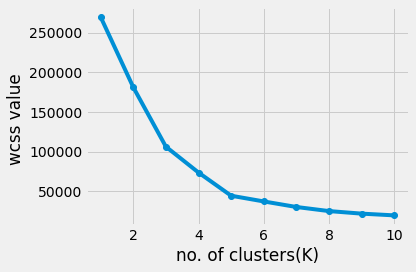

In [14]:
plt.plot(range(1,11),wcss,marker="o")
plt.xlabel("no. of clusters(K)")
plt.ylabel("wcss value ")
plt.tight_layout()


From this plot, we can see that there are two elbow points at k=3 and k=5 but after k=5 the wcss value decreases very slowly.So the appropriate no. of clusters is 5.

In [15]:
kmeans_cluster = KMeans(n_clusters=5)
kmeans_cluster.fit(new_data[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [16]:
kmeans_cluster.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [17]:
data["Cluster"] =kmeans_cluster.labels_

In [18]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
130,131,Male,47,71,9,2
123,124,Male,39,69,91,0
54,55,Female,50,43,45,1
42,43,Male,48,39,36,4
24,25,Female,54,28,14,4
162,163,Male,19,81,5,2
43,44,Female,31,39,61,1
26,27,Female,45,28,32,4
60,61,Male,70,46,56,1
168,169,Female,36,87,27,2


In [19]:
centroids=kmeans_cluster.cluster_centers_
centroids

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [20]:
centroids_df = pd.DataFrame(centroids,columns =["x","y"])
centroids_df

,x,y
0,86.538462,82.128205
1,55.296296,49.518519
2,88.200000,17.114286
3,25.727273,79.363636
4,26.304348,20.913043


In [21]:
pd.crosstab(index=data["Cluster"],columns=data["Gender"],normalize = True)

Gender,Female,Male
Cluster,,
0,0.105,0.090
1,0.240,0.165
2,0.080,0.095
3,0.065,0.045
4,0.070,0.045


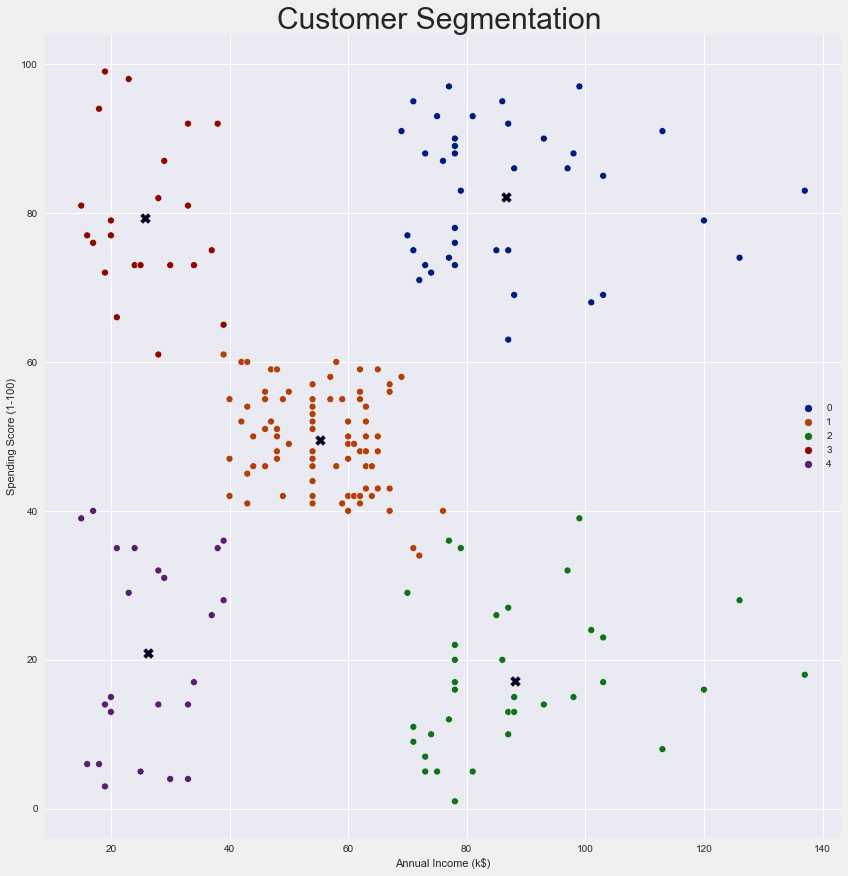

In [22]:
plt.figure(figsize=(12,12))
plt.style.use("seaborn")
plt.scatter(centroids_df["x"],centroids_df["y"],marker="X",c="#080022",s=100)
sns.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],hue=data["Cluster"],palette="dark",data=data);
plt.legend(loc='center right')
plt.tight_layout()
plt.title("Customer Segmentation ",fontsize=30);

In [23]:
data.groupby("Cluster")["Age","Annual Income (k$)","Spending Score (1-100)"].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


# Analysis

From this scatter plot , we can determine that the group of customers who come under cluster-1 should be targeted during the advertising campaigns as they have high income and they also spend a lot which is indicated by their high spending score. And customers of cluster-3 should be targeted also during specific seasons and this cluster offers an interesting opportunity because they spend more though they have relatively less income.Cluster-3 customers may be spending their money on costly items as their mean age is around 26.Also percentage of female customers are more in all clusters and in overall also.



In [24]:
data.to_csv("Segmented_Mall_Customers.csv")